<a href="https://colab.research.google.com/github/Davish26/textsummariser/blob/main/Exam_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Enron Email Data



### Full/Complete Dataset

The following code-cell will download the complete Enron email database to the Colab instance.  It will take about 1-2 mins to download.

In [82]:
##running wget command to download enron data
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-26 11:58:28--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-26 11:58:30--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  53.6MB/s    in 21s     

2023-05-26 11:58:50 (39.

In [83]:
#used to import sqlite3 which is used to manage database
import sqlite3

In [84]:
#creating connection with the database
conn = sqlite3.connect("enron.db")

In [85]:
#creating cursor
cur = conn.cursor()

In [86]:
#Checking schema of database
sql = """
SELECT name
FROM sqlite_master
WHERE type = 'table';
"""
cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [87]:
#Checking schema of employeelist
sql = """
PRAGMA table_info('employeelist');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [88]:
#Checking schema of message
sql = """
PRAGMA table_info('message');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [89]:
#Checking schema of recipient info
sql = """
PRAGMA table_info('recipientinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [90]:
#Checking schema of referenceinfo
sql = """
PRAGMA table_info('referenceinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

In [91]:
#Checking the format of the date
sql = """
SELECT Date
FROM message
"""
cur.execute(sql)
cur.fetchone()

('2000-01-21 04:51:00',)

In [92]:
#importing panda and converting to dataframe
import pandas as pd
sql = """
SELECT * from message;
"""
message_df = pd.read_sql_query(sql,conn)
message_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [93]:
#checking for null values
message_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252759 entries, 0 to 252758
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   mid         252759 non-null  int64 
 1   sender      252759 non-null  object
 2   date        252759 non-null  object
 3   message_id  252759 non-null  object
 4   subject     252759 non-null  object
 5   body        252759 non-null  object
 6   folder      252759 non-null  object
dtypes: int64(1), object(6)
memory usage: 13.5+ MB


In [94]:
#write sql query to count number of emails per day using strftime and COUNT() 
sql = """
SELECT strftime('%Y-%m-%d', date) AS day, COUNT(*) AS count_email
FROM message
Group by day
"""
cur.execute(sql)
cur.fetchone()

('0001-05-30', 2)

In [95]:
#write sql query to count number of emails per week using strftime and COUNT() 
sql = """
SELECT strftime('%Y-%w', date) AS week, COUNT(*) AS count_email
FROM message
Group by week
"""
cur.execute(sql)
cur.fetchone()

('0001-0', 4)

In [96]:
#write sql query to count number of emails per month using strftime and COUNT() 
sql = """
SELECT strftime('%Y-%m', date) AS month, COUNT(*) AS count_email
FROM message
Group by month
"""
cur.execute(sql)
cur.fetchone()

('0001-05', 2)

In [97]:
#importing panda and converting to dataframe
import pandas as pd
message_df = pd.read_sql_query(sql,conn)

In [98]:
#importing seaborn and mat plot lib
import seaborn as sns
import matplotlib.pyplot as plt

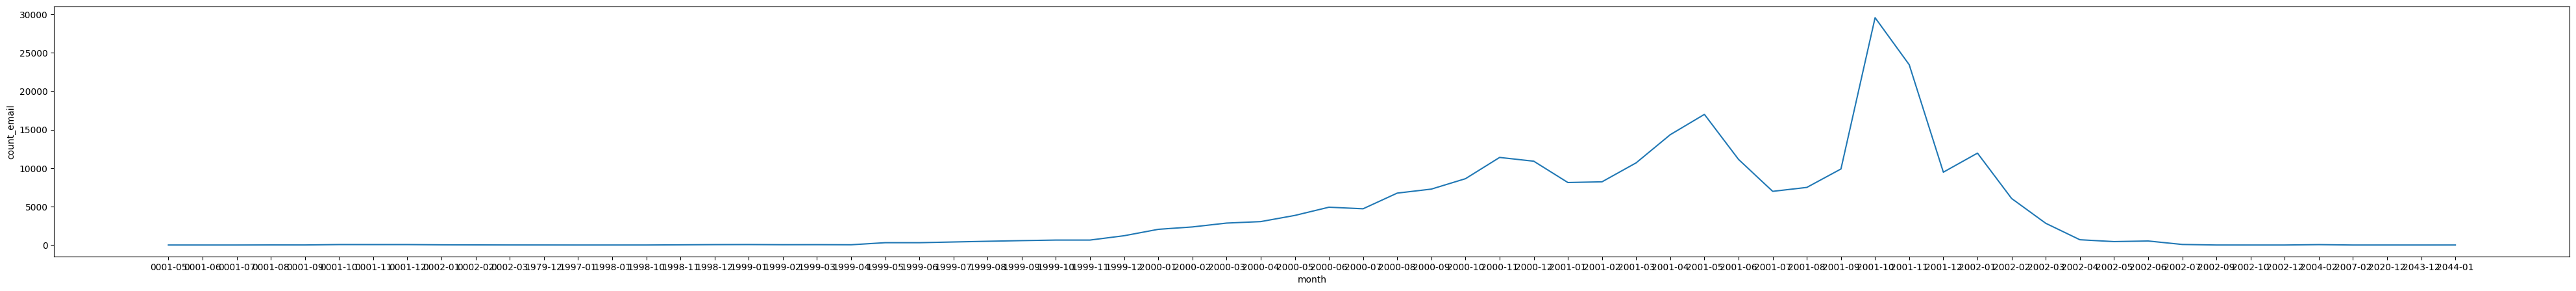

In [99]:
#plotting graph per month and performing analysis
fig = plt.subplots(figsize=(50, 5))
sns.lineplot(data = message_df, x='month', y='count_email')
plt.show()

It can be seen that it starts around the month of april and keeps increasing. It reaches its peak in the month of september in the year 2001 with a count of around 30000 mails. Around June 2002 we can notice that it goes to down to 0 again which is the year it went down. 

In [100]:
#Using sql query to take the top 10 senders from the message table
sender_sql = """
SELECT sender, COUNT(*) as count_email
FROM message
GROUP BY sender
ORDER BY count_email DESC
LIMIT 10
"""
sender_data = pd.read_sql_query(sender_sql, conn)

In [101]:
#Using sql query to take the top 10 recipients from the recipientinfo table
recipient_email = """
SELECT rvalue, COUNT(*) as count_email
FROM recipientinfo
GROUP BY rvalue
ORDER BY count_email DESC
LIMIT 10
"""
recipient_data = pd.read_sql_query(recipient_email, conn)

In [102]:
#Making sure whether it has selected the top 10 senders
sender_data

,sender,count_email
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
5,chris.germany@enron.com,3686
6,no.address@enron.com,3511
7,enron.announcements@enron.com,2838
8,matthew.lenhart@enron.com,2784
9,debra.perlingiere@enron.com,2549


In [103]:
#Making sure whether it has selected the top 10 recipients
recipient_data

,rvalue,count_email
0,no.address@enron.com,19198
1,jeff.dasovich@enron.com,11137
2,richard.shapiro@enron.com,11015
3,steven.j.kean@enron.com,10873
4,james.d.steffes@enron.com,10615
5,tana.jones@enron.com,9781
6,sara.shackleton@enron.com,9633
7,mark.e.taylor@enron.com,9090
8,louise.kitchen@enron.com,7603
9,pete.davis@enron.com,7509


<function matplotlib.pyplot.show(close=None, block=None)>

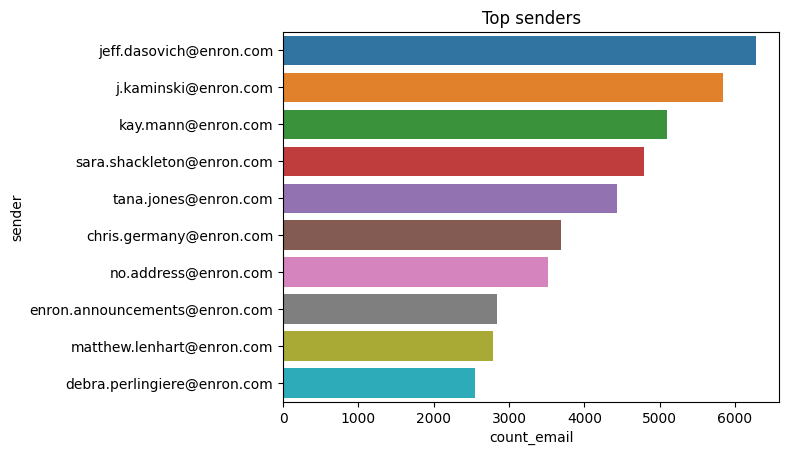

In [104]:
#Plotting barchart for the top 10 senders from the message table
sns.barplot(data=sender_data, x = 'count_email', y = 'sender')
plt.xlabel('count_email')
plt.ylabel('sender')
plt.title('Top senders')
plt.tight_layout
plt.show

The top 10 sender can be seen with "jeff.dasovich@enron.com" at the top position and a total count of around 6000 mails. It can be noted that the top senders have sent above 2000 mails. 

<function matplotlib.pyplot.show(close=None, block=None)>

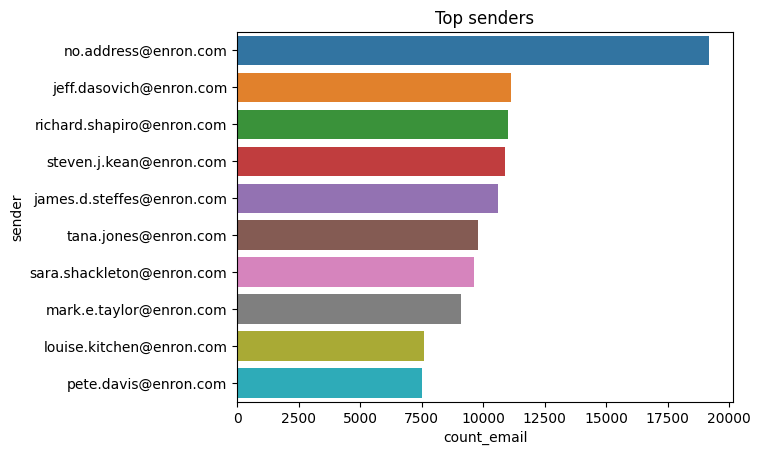

In [105]:
#Plotting barchart for the top 10 recipients from the recipientinfo table
sns.barplot(data=recipient_data, x = 'count_email', y = 'rvalue')
plt.xlabel('count_email')
plt.ylabel('sender')
plt.title('Top senders')
plt.tight_layout
plt.show

The top 10 recipients can be seen with "no.address@enron.com" at the top position and a total count of just less than 20000 mails. With an average of around 10000 emails, the top recipient is an outlier

In [106]:
#creating a query to see the amount of mails classified by their rtype
pie_query = """
SELECT rtype, COUNT(*) as count_email
FROM recipientinfo
GROUP BY rtype
"""
pie_data = pd.read_sql_query(pie_query, conn)
pie_data

,rtype,count_email
0,BCC,253713
1,CC,253735
2,TO,1556994


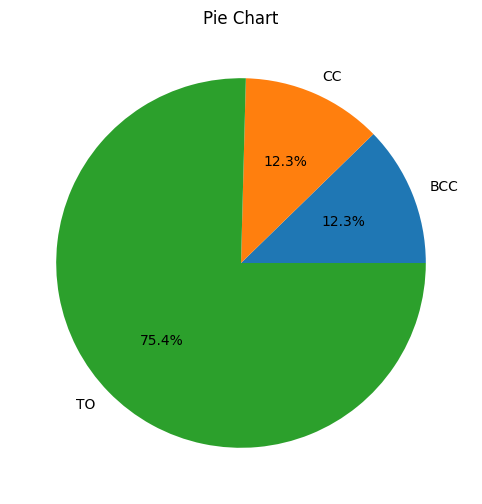

In [107]:
#plotting piechart using the count mails based on their rtype and values
plt.figure(figsize=(8,6))
plt.pie(data= pie_data, x= 'count_email', labels='rtype', autopct='%.1f%%')
plt.title('Pie Chart')
plt.show()

It can be noticed that the majority of the mails have been sent using the rtype "TO" which is 75.4% and due to near figures we can see that "CC" and "BCC" have the same amount of percentage. 

In [108]:
#conn.close is used to close the connection with the database
#conn.commit is used to save the changes
conn.close
conn.commit

<function Connection.commit()>